In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
plt.style.use('ggplot')

In [2]:
cd student

C:\Users\Mukesh  Yadav\Documents\python project\student


In [3]:

train = pd.read_csv("trainPort1.csv" )
test = pd.read_csv("testPort1.csv")

In [5]:
X = train.loc[:, ['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu','Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime','failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery','higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc','Walc', 'health', 'absences', 'PG1', 'PG2']]

Y = train.loc[:,"class"]
print("\n\nTop of features:")
print(X.head())
print("\n\nTop of labels")
print(Y.head())



Top of features:
  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob ...  \
0     MS   F   15       R     GT3       T     4     4  teacher     other ...   
1     MS   F   16       R     GT3       T     1     1  at_home     other ...   
2     GP   M   19       U     GT3       T     2     1    other     other ...   
3     MS   M   17       U     GT3       T     2     3    other  services ...   
4     MS   M   16       U     GT3       A     1     2    other     other ...   

  romantic famrel  freetime  goout  Dalc Walc health absences PG1 PG2  
0      yes      1         5      1     3    5      5        0  13  14  
1       no      4         4      3     1    1      5        2  10   9  
2       no      5         3      4     1    4      4       10   7  11  
3       no      4         4      3     1    1      3        4  14  15  
4       no      4         4      3     1    1      5        0  10  11  

[5 rows x 32 columns]


Top of labels
0     mid
1     low
2     mid

In [6]:
# For Sex, convert male ->1, female -> 0
sex_map = {"M":1, "F":0}
X.loc[:, "sex"] = X.loc[:, "sex"].map(sex_map)

# For romantic, convert yes ->1, no -> 0
romantic_map = {"yes":1, "no":0}
X.loc[:, "romantic"] = X.loc[:, "romantic"].map(romantic_map)

# For internet, convert yes ->1, no -> 0
internet_map = {"yes":1, "no":0}
X.loc[:, "internet"] = X.loc[:, "internet"].map(internet_map)



# For schoolsup, convert yes ->1, no -> 0
schoolsup_map = {"yes":1, "no":0}
X.loc[:, "schoolsup"] = X.loc[:, "schoolsup"].map(schoolsup_map)


# For famsup, convert yes ->1, no -> 0
famsup_map = {"yes":1, "no":0}
X.loc[:, "famsup"] = X.loc[:, "famsup"].map(famsup_map)


# For paid, convert yes ->1, no -> 0
paid_map = {"yes":1, "no":0}
X.loc[:, "paid"] = X.loc[:, "paid"].map(paid_map)

# For activities, convert yes ->1, no -> 0
activities_map = {"yes":1, "no":0}
X.loc[:, "activities"] = X.loc[:, "activities"].map(activities_map)

# For nursery, convert yes ->1, no -> 0
nursery_map = {"yes":1, "no":0}
X.loc[:, "nursery"] = X.loc[:, "nursery"].map(nursery_map)

# For higher, convert yes ->1, no -> 0
higher_map = {"yes":1, "no":0}
X.loc[:, "higher"] = X.loc[:, "higher"].map(higher_map)

# For school, convert gp ->1, ms -> 0
school_map = {"GP":1, "MS":0}
X.loc[:, "school"] = X.loc[:, "school"].map(school_map)

# For address, convert U ->1, R -> 0
address_map = {"U":1, "R":0}
X.loc[:, "address"] = X.loc[:, "address"].map(address_map)



# For famsize, convert GT3 ->1, LE3 -> 0
famsize_map = {"GT3":1, "LE3":0}
X.loc[:, "famsize"] = X.loc[:, "famsize"].map(famsize_map)

# For Pstatus, convert T ->1, A -> 0
Pstatus_map = {"T":1, "A":0}
X.loc[:, "Pstatus"] = X.loc[:, "Pstatus"].map(Pstatus_map)

# For Mjob, convert "teacher" -> 1 "health" ->2 "services" ->3 "at_home" -> 4 "other" -> 5
Mjob_map = {"teacher":1,"health":2,"services":3,"at_home":4,"other":5}
X.loc[:, "Mjob"] = X.loc[:, "Mjob"].map(Mjob_map)

# For Fjob, convert "teacher" -> 1 "health" ->2 "services" ->3 "at_home" -> 4 "other" -> 5
Fjob_map = {"teacher":1,"health":2,"services":3,"at_home":4,"other":5}
X.loc[:, "Fjob"] = X.loc[:, "Fjob"].map(Fjob_map)

# For reason, convert "home" -> 1 "reputation" ->2 "course" ->3 "other" -> 4
reason_map = {"home":1,"reputation":2,"course":3,"other":4}
X.loc[:, "reason"] = X.loc[:, "reason"].map(reason_map)


# For guardian, convert mother ->2, father -> 1 other -> 0
guardian_map = {"mother":2, "father":1, "other":0}
X.loc[:, "guardian"] = X.loc[:, "guardian"].map(guardian_map)
                                                

                                                
X.to_csv('cleanedPortView32FeatureKmeans.csv', sep=',')

X.head()







,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,PG1,PG2
0,0,0,15,0,1,1,4,4,1,5,...,1,1,5,1,3,5,5,0,13,14
1,0,0,16,0,1,1,1,1,4,5,...,0,4,4,3,1,1,5,2,10,9
2,1,1,19,1,1,1,2,1,5,5,...,0,5,3,4,1,4,4,10,7,11
3,0,1,17,1,1,1,2,3,5,3,...,0,4,4,3,1,1,3,4,14,15
4,0,1,16,1,1,0,1,2,5,5,...,0,4,4,3,1,1,5,0,10,11


In [7]:
# Split train set to X(features), Y(labels)
print("\n\nTest set size: %s" % (test.shape,))
toPredictTestSet = test.loc[:, ['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu','Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime','failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery','higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc','Walc', 'health', 'absences', 'PG1', 'PG2']]

# For Sex, convert male ->1, female -> 0
sex_map = {"M":1, "F":0}
toPredictTestSet.loc[:, "sex"] = toPredictTestSet.loc[:, "sex"].map(sex_map)

# For romantic, convert yes ->1, no -> 0
romantic_map = {"yes":1, "no":0}
toPredictTestSet.loc[:, "romantic"] = toPredictTestSet.loc[:, "romantic"].map(romantic_map)

# For internet, convert yes ->1, no -> 0
internet_map = {"yes":1, "no":0}
toPredictTestSet.loc[:, "internet"] = toPredictTestSet.loc[:, "internet"].map(internet_map)

# For schoolsup, convert yes ->1, no -> 0
schoolsup_map = {"yes":1, "no":0}
toPredictTestSet.loc[:, "schoolsup"] = toPredictTestSet.loc[:, "schoolsup"].map(schoolsup_map)


# For famsup, convert yes ->1, no -> 0
famsup_map = {"yes":1, "no":0}
toPredictTestSet.loc[:, "famsup"] = toPredictTestSet.loc[:, "famsup"].map(famsup_map)

# For paid, convert yes ->1, no -> 0
paid_map = {"yes":1, "no":0}
toPredictTestSet.loc[:, "paid"] = toPredictTestSet.loc[:, "paid"].map(paid_map)

# For activities, convert yes ->1, no -> 0
activities_map = {"yes":1, "no":0}
toPredictTestSet.loc[:, "activities"] = toPredictTestSet.loc[:, "activities"].map(activities_map)

# For nursery, convert yes ->1, no -> 0
nursery_map = {"yes":1, "no":0}
toPredictTestSet.loc[:, "nursery"] = toPredictTestSet.loc[:, "nursery"].map(nursery_map)

# For higher, convert yes ->1, no -> 0
higher_map = {"yes":1, "no":0}
toPredictTestSet.loc[:, "higher"] = toPredictTestSet.loc[:, "higher"].map(higher_map)

# For school, convert gp ->1, ms -> 0
school_map = {"GP":1, "MS":0}
toPredictTestSet.loc[:, "school"] = toPredictTestSet.loc[:, "school"].map(school_map)

# For address, convert U ->1, R -> 0
address_map = {"U":1, "R":0}
toPredictTestSet.loc[:, "address"] = toPredictTestSet.loc[:, "address"].map(address_map)

# For famsize, convert GT3 ->1, LE3 -> 0
famsize_map = {"GT3":1, "LE3":0}
toPredictTestSet.loc[:, "famsize"] = toPredictTestSet.loc[:, "famsize"].map(famsize_map)


# For Pstatus, convert T ->1, A -> 0
Pstatus_map = {"T":1, "A":0}
toPredictTestSet.loc[:, "Pstatus"] = toPredictTestSet.loc[:, "Pstatus"].map(Pstatus_map)

# For Mjob, convert "teacher" -> 1 "health" ->2 "services" ->3 "at_home" -> 4 "other" -> 5
Mjob_map = {"teacher":1,"health":2,"services":3,"at_home":4,"other":5}
toPredictTestSet.loc[:, "Mjob"] = toPredictTestSet.loc[:, "Mjob"].map(Mjob_map)

# For Fjob, convert "teacher" -> 1 "health" ->2 "services" ->3 "at_home" -> 4 "other" -> 5
Fjob_map = {"teacher":1,"health":2,"services":3,"at_home":4,"other":5}
toPredictTestSet.loc[:, "Fjob"] = toPredictTestSet.loc[:, "Fjob"].map(Fjob_map)

# For reason, convert "home" -> 1 "reputation" ->2 "course" ->3 "other" -> 4
reason_map = {"home":1,"reputation":2,"course":3,"other":4}
toPredictTestSet.loc[:, "reason"] = toPredictTestSet.loc[:, "reason"].map(reason_map)

# For guardian, convert mother ->2, father -> 1 other -> 0
guardian_map = {"mother":2, "father":1, "other":0}
toPredictTestSet.loc[:, "guardian"] = toPredictTestSet.loc[:, "guardian"].map(guardian_map)







Test set size: (195, 34)


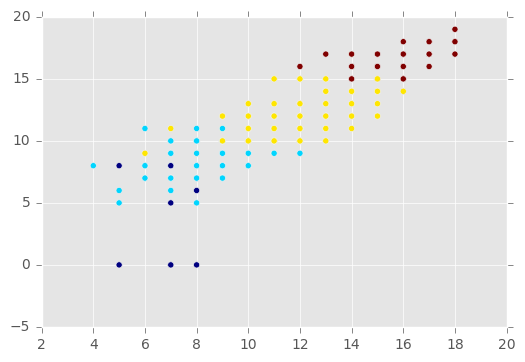

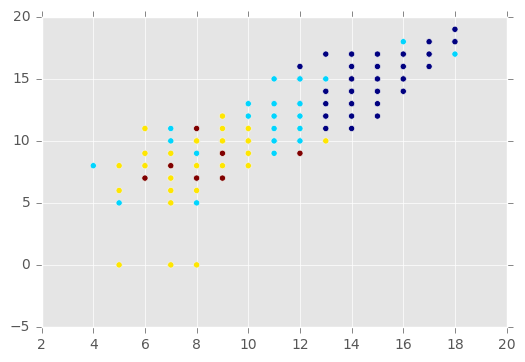

In [8]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import pylab as pl


YK = train.loc[:,"class"]
k_map = {"fail":0, "low":1, "mid":2,"high":3}
YK = YK.map(k_map)

pl.scatter(X['PG1'], X['PG2'], c=YK)
kmeans = KMeans(n_clusters=4, random_state=45)
kmeans.fit(X)
pl.figure('K-means with 3 clusters')
pl.scatter(X['PG1'], X['PG2'], c=kmeans.labels_)
pl.show()

In [9]:
kmeans.predict(toPredictTestSet)

array([1, 3, 0, 1, 0, 0, 2, 1, 0, 3, 2, 1, 0, 2, 0, 2, 2, 2, 2, 2, 0, 0, 2,
       0, 2, 1, 0, 2, 0, 2, 2, 0, 0, 0, 3, 0, 0, 1, 0, 2, 2, 0, 2, 3, 1, 0,
       2, 0, 2, 0, 2, 1, 3, 2, 1, 2, 2, 1, 0, 2, 2, 1, 1, 2, 2, 0, 1, 2, 1,
       0, 3, 1, 1, 0, 1, 2, 0, 0, 2, 0, 3, 1, 3, 3, 1, 0, 0, 3, 1, 0, 2, 2,
       1, 0, 3, 0, 1, 0, 2, 0, 2, 2, 3, 1, 1, 0, 1, 2, 2, 0, 2, 0, 2, 2, 0,
       0, 0, 2, 1, 0, 0, 1, 2, 2, 3, 2, 1, 2, 1, 0, 0, 0, 2, 0, 2, 1, 0, 1,
       0, 1, 2, 0, 0, 0, 1, 0, 0, 0, 0, 3, 2, 2, 0, 0, 1, 0, 1, 1, 0, 2, 2,
       0, 2, 0, 2, 2, 2, 2, 0, 2, 0, 0, 2, 2, 2, 1, 0, 1, 0, 1, 0, 0, 2, 1,
       2, 0, 1, 0, 1, 2, 0, 0, 2, 0, 1])

In [10]:
#OVER

In [11]:
'''kmeans = KMeans(n_clusters=6, random_state=45).fit(X)
print(kmeans)'''

'kmeans = KMeans(n_clusters=6, random_state=45).fit(X)\nprint(kmeans)'

In [13]:
print(kmeans.labels_)

[0 2 1 0 2 2 2 2 1 0 1 0 0 2 0 2 0 2 2 2 1 0 0 0 0 2 0 2 2 0 0 0 0 0 1 1 2
 1 1 2 0 0 0 0 2 2 2 2 2 1 0 0 1 2 0 1 0 2 1 1 1 0 1 0 2 2 0 1 2 2 0 1 1 1
 2 2 2 1 0 2 1 1 2 2 0 0 0 0 0 2 2 2 1 1 0 1 0 2 2 0 1 0 2 2 0 2 2 2 0 2 2
 3 2 2 2 3 1 1 0 2 3 0 1 2 1 0 2 2 1 2 0 3 2 3 2 1 1 2 0 2 0 0 0 0 3 3 2 0
 1 0 2 1 1 1 1 0 0 2 2 0 0 2 2 2 1 0 2 1 2 1 2 2 0 2 0 2 0 0 0 1 1 0 2 1 2
 2 0 2 1 2 0 0 2 0 3 1 3 1 2 1 1 0 0 0 3 0 2 0 2 0 0 2 2 1 2 0 1 3 0 1 1 2
 0 1 0 2 0 2 1 0 0 2 2 3 0 0 0 2 0 0 1 3 1 1 2 0 2 2 0 1 1 2 1 0 1 3 0 0 2
 2 2 0 1 0 0 0 1 2 2 0 2 1 0 0 1 3 1 0 2 2 1 2 0 0 1 0 2 2 2 2 0 1 0 0 0 0
 2 1 0 2 1 2 2 0 2 3 0 1 0 1 2 2 1 2 0 1 2 0 2 1 2 0 0 2 0 2 0 2 2 2 2 1 1
 2 2 0 2 0 0 0 0 3 2 1 0 1 2 1 2 1 0 2 0 1 1 0 2 3 2 2 3 0 1 2 2 2 0 0 0 2
 2 0 2 0 2 1 1 0 2 1 2 0 0 2 1 0 0 1 2 3 0 2 2 2 0 0 3 0 3 2 0 0 2 3 0 2 2
 2 1 1 2 3 2 0 1 2 2 3 0 0 1 0 0 2 0 1 0 0 1 1 0 0 1 1 2 1 2 2 0 3 2 0 1 1
 2 2 2 1 1 2 2 0 0 0]


In [14]:
'''
%matplotlib inline
plt.subplot(121)
plt.scatter(X.iloc[0],X.iloc[1],c=kmeans)
plt.title("ans")
plt.show()
'''

'\n%matplotlib inline\nplt.subplot(121)\nplt.scatter(X.iloc[0],X.iloc[1],c=kmeans)\nplt.title("ans")\nplt.show()\n'

In [15]:
# converting into category exclude it..


#w= pd.cut(Y, bins=10)
w = pd.cut(Y, bins=[0, 5, 10, 15,20], include_lowest=True, labels=['fail','low', 'mid', 'high'])

print (Y,w)



yPrediction = test.loc[:,"PG3"]

w1 = pd.cut(yPrediction, bins=[0, 5, 10, 15,20], include_lowest=True, labels=['fail','low', 'mid', 'high'])

print (yPrediction,w1)


w1.to_csv('outclass.csv', sep=',')


(0       mid
1       low
2       mid
3      high
4       mid
5       mid
6       mid
7      fail
8       mid
9       mid
10      mid
11      mid
12     high
13     fail
14     high
15      mid
16      mid
17      low
18      low
19      mid
20      mid
21      mid
22      mid
23      mid
24     high
25      mid
26      mid
27      low
28      low
29     high
       ... 
424    high
425     mid
426    high
427     mid
428     mid
429     low
430     mid
431    high
432     low
433     mid
434     low
435     mid
436     low
437     low
438     mid
439     low
440     mid
441     mid
442     mid
443     low
444     low
445     mid
446     low
447     mid
448     low
449     low
450     mid
451    high
452    high
453     mid
Name: class, dtype: object, 0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
5      NaN
6      NaN
7      NaN
8      NaN
9      NaN
10     NaN
11     NaN
12     NaN
13     NaN
14     NaN
15     NaN
16     NaN
17     NaN
18     NaN
19     NaN
20     NaN
21     N